# DNA Damage model formation & Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
warnings.filterwarnings(action = 'ignore')

## 1. Preparing Cell Painting Data & Cell Health Data

### Load IDR-0080 Data & Cell Health Data
### Reference : https://pubmed.ncbi.nlm.nih.gov/33534641/

In [3]:
x_df = pd.read_csv('x_df.csv', index_col = None)
x_df = x_df.iloc[:, 1:]
x_df

,Cells_AreaShape_Compactness,Cells_AreaShape_Eccentricity,Cells_AreaShape_Extent,Cells_AreaShape_Orientation,Cells_AreaShape_Zernike_0_0,Cells_AreaShape_Zernike_1_1,Cells_AreaShape_Zernike_2_0,Cells_AreaShape_Zernike_2_2,Cells_AreaShape_Zernike_3_3,Cells_AreaShape_Zernike_4_0,...,Nuclei_Texture_SumEntropy_DNA_5_0,Nuclei_Texture_SumEntropy_ER_5_0,Nuclei_Texture_SumEntropy_Mito_5_0,Nuclei_Texture_SumEntropy_RNA_5_0,Nuclei_Texture_SumVariance_AGP_5_0,Nuclei_Texture_SumVariance_DNA_10_0,Nuclei_Texture_SumVariance_DNA_5_0,Nuclei_Texture_Variance_AGP_5_0,Nuclei_Texture_Variance_DNA_10_0,Nuclei_Texture_Variance_DNA_5_0
0,-0.155631,0.014646,0.188053,1.231056,0.031064,-0.585477,0.467976,0.254203,0.129446,0.027104,...,0.882859,0.841687,0.339831,0.562585,0.879950,0.904785,0.923143,0.944998,0.984938,0.961945
1,-0.247842,-0.030773,0.433778,0.062456,0.266860,0.838679,-0.467417,0.340793,-0.024450,0.418928,...,0.513820,0.344554,0.134318,0.018933,0.359496,0.557998,0.504751,0.407462,0.522251,0.519441
2,0.794740,0.743296,-0.438752,0.827288,-0.728499,-0.422394,-0.147624,0.083870,-0.160722,-0.363004,...,-0.456539,0.373750,-0.111184,-0.042733,-0.840771,-0.536215,-0.497296,-0.748232,-0.515240,-0.526734
3,0.480421,0.821096,-0.337898,0.054479,-0.662314,0.067979,0.025010,0.158138,-0.342062,-0.434783,...,0.115466,0.186411,0.249292,0.688435,-0.521766,0.124801,0.063444,-0.560178,-0.062851,0.026056
4,-0.074895,0.569377,0.571678,0.976504,-1.111947,1.348542,0.584906,-3.128483,-2.324773,1.945741,...,0.154802,2.975785,1.128414,-0.638839,0.753884,0.808944,0.594059,0.674015,0.140325,0.417465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,0.247953,0.331462,-0.228694,0.648857,-0.394799,-0.477804,-0.203016,0.387554,0.485502,-0.302333,...,0.305814,0.952718,0.697652,0.087784,0.266722,0.254346,0.367875,0.191115,0.220894,0.257950
353,1.455427,1.153796,-1.395398,1.167778,-1.413069,-0.684198,-0.923160,-0.145706,-0.535382,0.224011,...,-0.207834,-0.280317,-0.422648,-0.763835,-0.254697,-0.380000,-0.404530,-0.266026,-0.341998,-0.287431
354,0.719510,0.691270,-0.999921,0.701489,-0.965601,-0.937154,-0.218680,0.145943,-0.149745,-0.637266,...,0.011171,-0.575574,-0.272102,-0.101586,-0.117305,-0.083261,-0.085342,-0.213054,-0.126822,-0.101668
355,-0.255658,0.075113,0.999995,0.251456,0.237111,0.342004,0.084765,0.957639,-0.562746,-0.409896,...,0.766721,0.518347,1.450779,1.421830,1.483743,0.639279,0.614153,1.624128,0.523767,0.603819


In [129]:
# Load cell health data
y_all_df = pd.read_csv('cell_health_modz.tsv', sep = '\t')
y_df = y_all_df['cc_all_n_spots_h2ax_per_nucleus_area_mean']
y_f = y_all_df[['cc_all_n_spots_h2ax_per_nucleus_area_mean']]

### Load Chemical Annotation Data
### Reference : https://gigadb.org/dataset/100351

In [5]:
# Chemical annotation 
chem_dat = pd.read_csv('chemical_annotations.csv')
chem_dat

,BROAD_ID,CPD_NAME,CPD_NAME_TYPE,CPD_SAMPLE_ID,DOS_LIBRARY,SOURCE_NAME,CHEMIST_NAME,VENDOR_CATALOG_ID,CPD_SMILES,USERCOMMENT
0,BRD-A56675431-001-04-0,altizide,INN,SA82748,NaN,Prestwick Chemical Inc.,NaN,Prestw-721,NS(=O)(=O)c1cc2c(NC(CSCC=C)NS2(=O)=O)cc1Cl,NaN
1,BRD-A51829654-001-01-4,"BRL-15,572",common,SA82481,NaN,Biomol International Inc.,NaN,AC-536,OC(CN1CCN(CC1)c1cccc(Cl)c1)C(c1ccccc1)c1ccccc1,NaN
2,BRD-K04046242-001-03-6,equilin,primary-common,SA82922,NaN,Prestwick Chemical Inc.,NaN,Prestw-850,C[C@]12CC[C@H]3C(=CCc4cc(O)ccc34)[C@@H]1CCC2=O,NaN
3,BRD-K16508793-001-01-8,diazepam,INN,SA59660,NaN,MicroSource Discovery Systems Inc.,NaN,1900003,CN1c2ccc(Cl)cc2C(=NCC1=O)c1ccccc1,NaN
4,BRD-K09397065-001-01-6,SR 57227A,to-be-curated,SA82504,NaN,Biomol International Inc.,NaN,AC-561,NC1CCN(CC1)c1cccc(Cl)n1,NaN
...,...,...,...,...,...,...,...,...,...,...
30611,BRD-K47092271-001-01-7,BRD-K47092271,BROAD_CPD_ID,SA799574,Benzofuran Library,Broad Institute of MIT and Harvard,NaN,NaN,COCC(=O)Nc1ccc2O[C@@H]3[C@@H](C[C@H](CC(=O)NCC...,NaN
30612,BRD-K30358777-001-01-0,BRD-K30358777,BROAD_CPD_ID,SA800605,Benzofuran Library,Broad Institute of MIT and Harvard,NaN,NaN,COc1ccc(CNC(=O)C[C@@H]2C[C@H]3[C@H](Oc4ccc(NC(...,NaN
30613,BRD-K32423836-001-01-9,BRD-K32423836,BROAD_CPD_ID,SA799806,Benzofuran Library,Broad Institute of MIT and Harvard,NaN,NaN,COCCNC(=O)C[C@H]1C[C@@H]2[C@@H](Oc3ccc(NC(=O)C...,NaN
30614,BRD-K28250273-001-01-2,BRD-K28250273,BROAD_CPD_ID,SA1482018,Azetidine Nitrile Full Library,Broad Institute of MIT and Harvard,NaN,NaN,OC[C@H]1[C@H]([C@H](C#N)N1C(=O)Nc1cccc(F)c1)c1...,NaN


In [6]:
# Load validation datasets
x_val_dat = pd.read_csv('x_val_df.csv')
x_val_meta = pd.read_csv('x_val_meta.csv')

In [7]:
# Check unique compound in validation dataset
compound = x_val_meta['Metadata_broad_sample'].unique()
len(compound)

30617

# 2. Cell Health Labeling for Classification Model

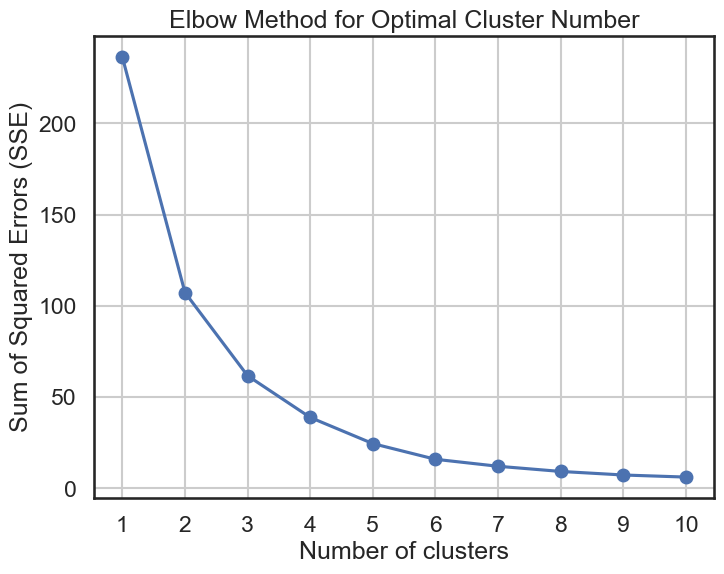

In [130]:
from sklearn.cluster import KMeans

# Create an array to store SSE values for different cluster numbers
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, random_state=42)
    kmeans.fit(y_df.values.reshape(-1, 1))
    sse.append(kmeans.inertia_)


# Plotting the elbow curve
plt.figure(figsize = (8,6))
plt.plot(range(1, 11), sse, marker = 'o')
plt.title('Elbow Method for Optimal Cluster Number')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.xticks(np.arange(1, 11, 1))
plt.grid(True)
plt.savefig('Elbow Method.png', dpi = 300)
plt.show()

In [133]:
# y_df Categorized

kmeans = KMeans(n_clusters = 6, random_state = 42)
y_clusters = kmeans.fit_predict(y_df.values.reshape(-1, 1))

y_df_binarized = y_clusters

In [135]:
# Remapping
mapping = {4: 0, 0: 0, 3: 0, 5: 0, 2: 1, 1: 1} # 0 : Low, 1: High
y_df_binarized = np.vectorize(mapping.get)(y_df_binarized)

In [136]:
from collections import Counter

Counter(y_df_binarized)

Counter({0: 306, 1: 51})

In [65]:
y_df.sort_values(ascending = False).to_excel('y_df.xlsx')

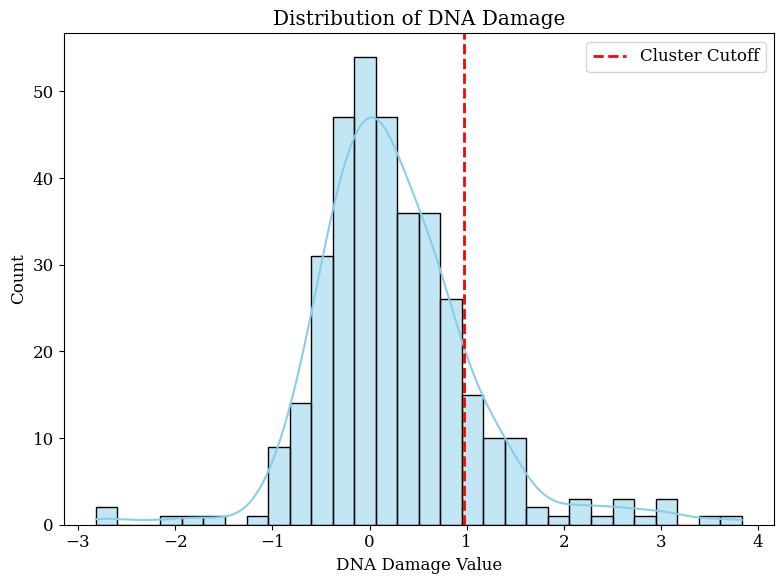

In [89]:
cutoff_value = 0.970800566691554

# Data Distribution visualization
plt.figure(figsize=(8, 6))

# Histogram
sns.histplot(y_df, bins=30, kde=True, color='skyblue', edgecolor='black', alpha=0.5)

plt.axvline(x=cutoff_value, color='red', linestyle='--', linewidth=2, label='Cluster Cutoff')

plt.title('Distribution of DNA Damage')
plt.xlabel('DNA Damage Value')
plt.ylabel('Count')
plt.tight_layout()
plt.legend()
plt.savefig('Distribution of DNA Damage.png', dpi=300)
plt.show()

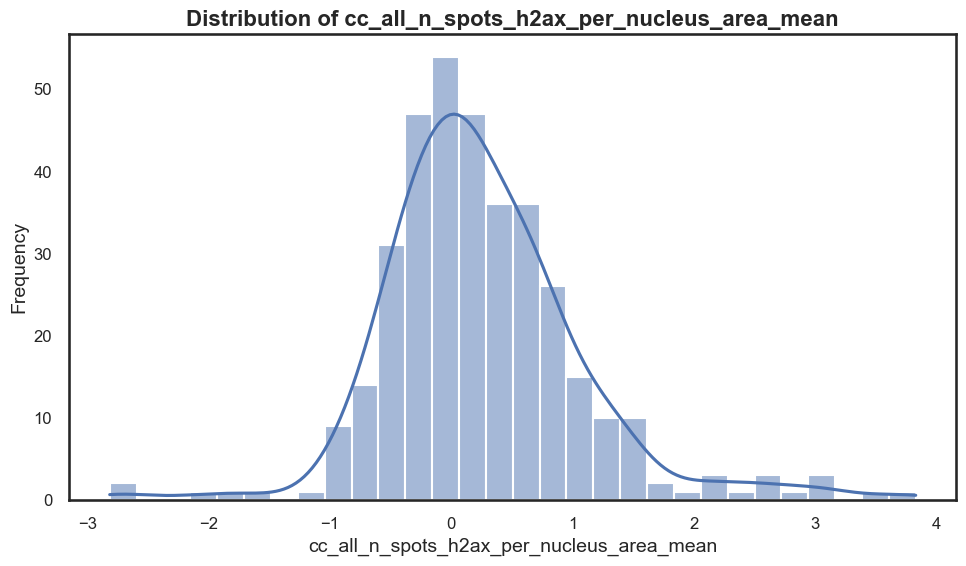

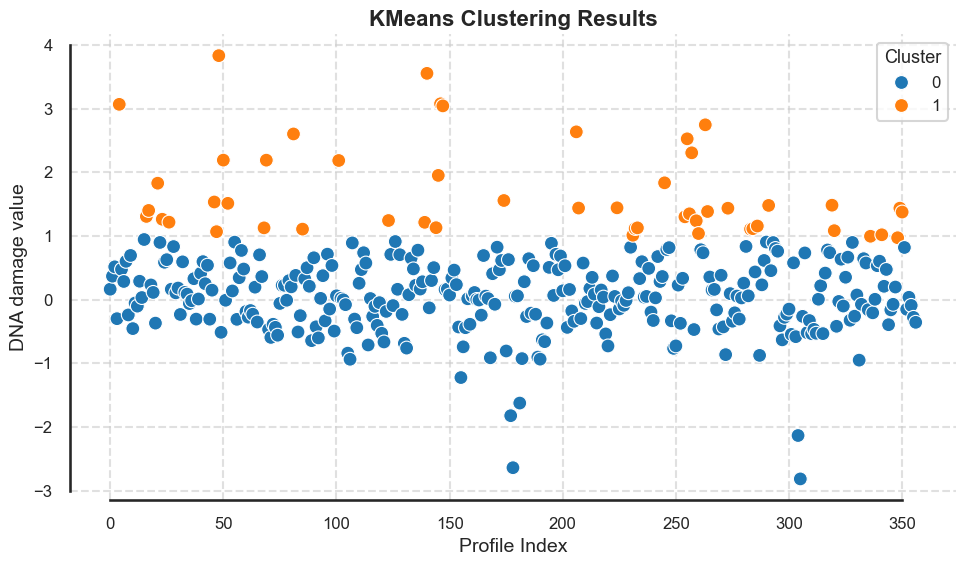

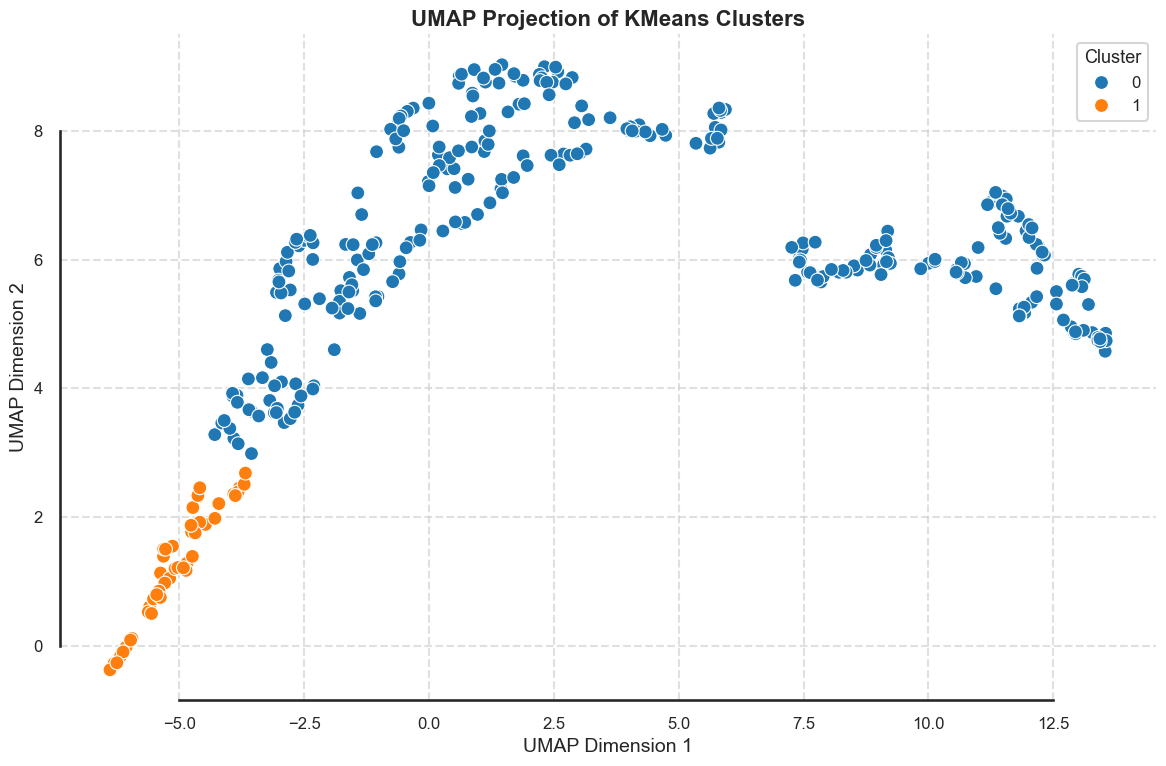

In [137]:
import umap

# style setting
sns.set(style='white', context='talk')

# Data distribution check
plt.figure(figsize=(10, 6))
sns.histplot(y_f['cc_all_n_spots_h2ax_per_nucleus_area_mean'], bins=30, kde=True)
plt.title('Distribution of cc_all_n_spots_h2ax_per_nucleus_area_mean', fontsize=16, weight='bold')
plt.xlabel('cc_all_n_spots_h2ax_per_nucleus_area_mean', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig('Data distribution.png', dpi = 300)
plt.show()

# Standard deviation of ros value
std_dev = y_f['cc_all_n_spots_h2ax_per_nucleus_area_mean'].std()

# Noise 
noise_magnitude = 0.3 * std_dev

# Synthetic feature 
y_f['synthetic_feature'] = y_f['cc_all_n_spots_h2ax_per_nucleus_area_mean'] + np.random.normal(0, noise_magnitude, size=y_f.shape[0])

# Cluster labels
y_f['cluster'] = y_df_binarized

# KMeans Clustering Results plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=y_f, x=y_f.index, y='cc_all_n_spots_h2ax_per_nucleus_area_mean', hue='cluster', palette='tab10', marker='o', s=100)
plt.title('KMeans Clustering Results', fontsize=16, weight='bold')
plt.xlabel('Profile Index', fontsize=14)
plt.ylabel('DNA damage value', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Cluster', title_fontsize='13', fontsize='12', loc='upper right')
plt.grid(True, linestyle='--', alpha=0.6)
sns.despine(trim=True)
plt.tight_layout()
plt.savefig('Kmean.png', dpi = 300)
plt.show()

# UMAP transformation
umap_model = umap.UMAP(n_neighbors=17, min_dist=0.1, metric='euclidean')
y_umap = umap_model.fit_transform(y_f[['cc_all_n_spots_h2ax_per_nucleus_area_mean', 'synthetic_feature']])

# Add UMAP results to DataFrame
y_f['umap_1'] = y_umap[:, 0]
y_f['umap_2'] = y_umap[:, 1]

# UMAP results plot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=y_f, x='umap_1', y='umap_2', hue='cluster', palette='tab10', marker='o', s=100)
plt.title('UMAP Projection of KMeans Clusters', fontsize=16, weight='bold')
plt.xlabel('UMAP Dimension 1', fontsize=14)
plt.ylabel('UMAP Dimension 2', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Cluster', title_fontsize='13', fontsize='12', loc='upper right')
plt.grid(True, linestyle='--', alpha=0.6)
sns.despine(trim=True)
plt.tight_layout()
plt.savefig('UMAP.png', dpi = 300)
plt.show()


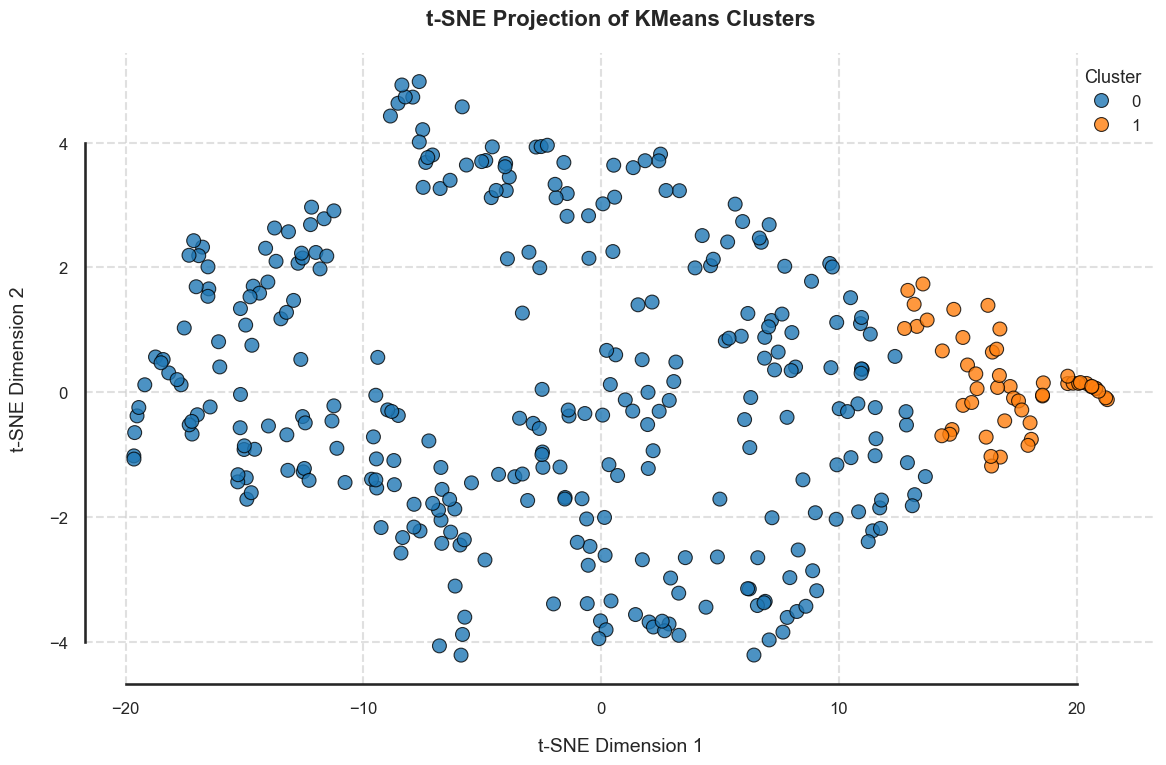

In [139]:
from sklearn.manifold import TSNE

# Fit and transform the data using t-SNE
tsne_model = TSNE(n_components=2, perplexity=30, n_iter=300, random_state=42)
y_tsne = tsne_model.fit_transform(y_f[['cc_all_n_spots_h2ax_per_nucleus_area_mean', 'synthetic_feature']])

# Add t-SNE results to the dataframe
y_f['tsne_1'] = y_tsne[:, 0]
y_f['tsne_2'] = y_tsne[:, 1]

# Plot t-SNE results
plt.figure(figsize=(12, 8))
sns.scatterplot(data=y_f, x='tsne_1', y='tsne_2', hue='cluster', palette='tab10', marker='o', s=100, edgecolor='black', alpha=0.8)
plt.title('t-SNE Projection of KMeans Clusters', fontsize=16, weight='bold', pad=20)
plt.xlabel('t-SNE Dimension 1', fontsize=14, labelpad=15)
plt.ylabel('t-SNE Dimension 2', fontsize=14, labelpad=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Cluster', title_fontsize='13', fontsize='12', loc='upper right', frameon=False)
plt.grid(True, linestyle='--', alpha=0.6)
sns.despine(trim=True)
plt.tight_layout()
plt.savefig('t-SNE.png', dpi = 300)
plt.show()


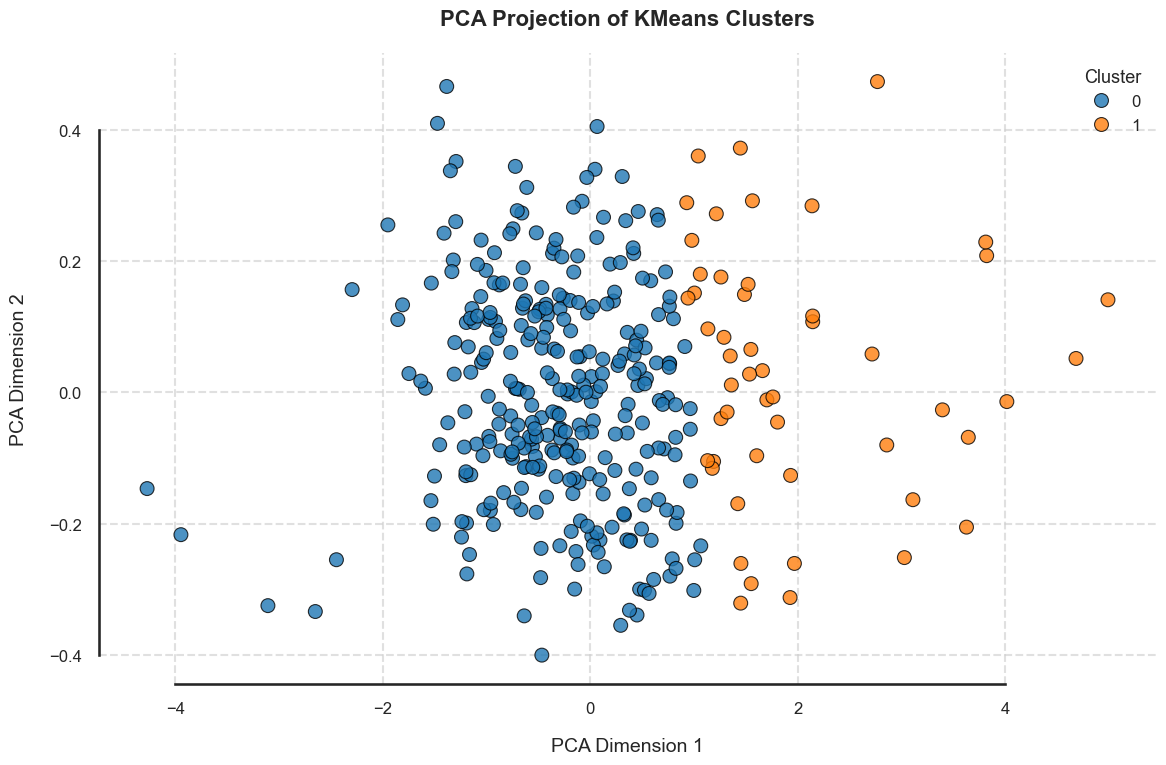

In [140]:
from sklearn.decomposition import PCA

# PCA fit
pca_model = PCA(n_components=2)
y_pca = pca_model.fit_transform(y_f[['cc_all_n_spots_h2ax_per_nucleus_area_mean', 'synthetic_feature']])

# PCA results
y_f['pca_1'] = y_pca[:, 0]
y_f['pca_2'] = y_pca[:, 1]

# PCA results visualization
plt.figure(figsize=(12, 8))
sns.scatterplot(data=y_f, x='pca_1', y='pca_2', hue='cluster', palette='tab10', marker='o', s=100, edgecolor='black', alpha=0.8)
plt.title('PCA Projection of KMeans Clusters', fontsize=16, weight='bold', pad=20)
plt.xlabel('PCA Dimension 1', fontsize=14, labelpad=15)
plt.ylabel('PCA Dimension 2', fontsize=14, labelpad=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Cluster', title_fontsize='13', fontsize='12', loc='upper right', frameon=False)
plt.grid(True, linestyle='--', alpha=0.6)
sns.despine(trim=True)
plt.tight_layout()
plt.savefig('PCA.png', dpi = 300)
plt.show()

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, callbacks

# 3. Oversampling (SMOTE)

In [14]:
from imblearn.over_sampling import SMOTE
from sklearn.utils.class_weight import compute_sample_weight

# Data Split
X_train, X_test, y_train, y_test = train_test_split(x_df, y_df_binarized, test_size = 0.3, random_state = 42, shuffle  = True)


# Over Sampleing
smote = SMOTE(random_state = 42)

X_train_s, y_train_s = smote.fit_resample(X_train, y_train)

# Data Flatten
y_train_s = np.ravel(y_train_s)
y_test = np.ravel(y_test)


# 4. Classification Model Formation & Check Accuracy

## Oversampling (o) / Model weights (o)

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

class_weights = {0: 3.0, 1: 10.0}

# Models Dictionary
models = {
    'RandomForest': RandomForestClassifier(random_state=42, class_weight= class_weights),
    'GradientBoosting': GradientBoostingClassifier(random_state=42),
    'SVM': SVC(random_state=42, class_weight= class_weights),
    'LogisticRegression': LogisticRegression(random_state=42, class_weight= class_weights),
    'SGDClassifier': SGDClassifier(random_state=42, class_weight= class_weights),
    'KNeighbors': KNeighborsClassifier(),
    'GaussianNB': GaussianNB(),
    'DecisionTree': DecisionTreeClassifier(random_state=42, class_weight= class_weights)
}

# models parameters setting
param_grids = {
    'RandomForest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['auto', 'sqrt', 'log2']
    },
    'GradientBoosting': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.1, 0.05, 0.01],
        'max_depth': [3, 5, 10],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['auto', 'sqrt', 'log2']
    },
    'SVM': {
        'C': [0.1, 1, 10],
        'gamma': ['scale', 'auto'],
        'kernel': ['linear', 'rbf', 'poly']
    },
    'LogisticRegression': {
        'C': [0.1, 1, 10],
        'penalty': ['l1','l2']
    },
    'SGDClassifier': {
        'alpha': [0.0001, 0.001, 0.01, 0.1],
        'penalty': ['l1', 'l2']
    },
    'KNeighbors': {
        'n_neighbors': [3, 5, 10],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    },
    'GaussianNB': {}, 
    'DecisionTree': {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['auto', 'sqrt', 'log2']
    }
}

# Best Parameter searching
results = {}
result_1 = {}

for model_name, model in models.items():
    print(f"Training {model_name}...")
    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[model_name], cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
    grid_search.fit(X_train_s, y_train_s)
    
    # Show Best Parameters
    print(f"Best Parameters for {model_name}:")
    print(grid_search.best_params_)
    print(f"Best Cross-validation Accuracy for {model_name}: {grid_search.best_score_:.4f}")
    
    # Prediction with optimal model
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    
    # Store ersults in the dictionary
    results[model_name] = {
        'accuracy' : test_accuracy,
        'mse' : mse
    }
    
    # Assesment score present
    print(f"\nTest Accuracy for {model_name}: {test_accuracy:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("---------------------------------------")
    # Generate the classification report as a dictionary
    report_1 = classification_report(y_test, y_pred, output_dict=True)

    # Store result
    result_1[model_name] = {
        'f1_score' : report_1['weighted avg']['f1-score'],
        'accuracy' : report_1['accuracy']
    }

# Accuracy 
print("\nTest Accuracy Results:")
for model_name, metrics in results.items():
    print(f"{model_name} Accuracy : {metrics['accuracy']: .4f}, MSE : {metrics['mse']: .2f}")

Training RandomForest...
Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Parameters for RandomForest:
{'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-validation Accuracy for RandomForest: 0.9132

Test Accuracy for RandomForest: 0.7963
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.87      0.88        93
           1       0.29      0.33      0.31        15

    accuracy                           0.80       108
   macro avg       0.59      0.60      0.60       108
weighted avg       0.81      0.80      0.80       108

---------------------------------------
Training GradientBoosting...
Fitting 5 folds for each of 729 candidates, totalling 3645 fits
Best Parameters for GradientBoosting:
{'learning_rate': 0.1, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Best Cross-valid

## Oversampling (x) / Model Weights (o)

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

# Data Split
X_train, X_test, y_train, y_test = train_test_split(x_df, y_df_binarized, test_size = 0.3, random_state = 42, shuffle  = True)

# Models Dictionary
models = {
    'RandomForest': RandomForestClassifier(random_state=42, class_weight= class_weights),
    'GradientBoosting': GradientBoostingClassifier(random_state=42),
    'SVM': SVC(random_state=42, class_weight= class_weights),
    'LogisticRegression': LogisticRegression(random_state=42, class_weight= class_weights),
    'SGDClassifier': SGDClassifier(random_state=42, class_weight= class_weights),
    'KNeighbors': KNeighborsClassifier(),
    'GaussianNB': GaussianNB(),
    'DecisionTree': DecisionTreeClassifier(random_state=42, class_weight= class_weights)
}

# models parameters setting
param_grids = {
    'RandomForest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['auto', 'sqrt', 'log2']
    },
    'GradientBoosting': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.1, 0.05, 0.01],
        'max_depth': [3, 5, 10],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['auto', 'sqrt', 'log2']
    },
    'SVM': {
        'C': [0.1, 1, 10],
        'gamma': ['scale', 'auto'],
        'kernel': ['linear', 'rbf', 'poly']
    },
    'LogisticRegression': {
        'C': [0.1, 1, 10],
        'penalty': ['l1','l2']
    },
    'SGDClassifier': {
        'alpha': [0.0001, 0.001, 0.01, 0.1],
        'penalty': ['l1', 'l2']
    },
    'KNeighbors': {
        'n_neighbors': [3, 5, 10],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    },
    'GaussianNB': {}, 
    'DecisionTree': {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['auto', 'sqrt', 'log2']
    }
}

# Best Parameter searching
results = {}
result_2 = {}

for model_name, model in models.items():
    print(f"Training {model_name}...")
    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[model_name], cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    # Show Best Parameters
    print(f"Best Parameters for {model_name}:")
    print(grid_search.best_params_)
    print(f"Best Cross-validation Accuracy for {model_name}: {grid_search.best_score_:.4f}")
    
    # Prediction with optimal model
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    
    # Store ersults in the dictionary
    results[model_name] = {
        'accuracy' : test_accuracy,
        'mse' : mse
    }
    
    # Assesment score present
    print(f"\nTest Accuracy for {model_name}: {test_accuracy:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("---------------------------------------")

    # Generate the classification report as a dictionary
    report_2 = classification_report(y_test, y_pred, output_dict=True)

    # Store result
    result_2[model_name] = {
        'f1_score' : report_2['weighted avg']['f1-score'],
        'accuracy' : report_2['accuracy']
    }


# Accuracy 
print("\nTest Accuracy Results:")
for model_name, metrics in results.items():
    print(f"{model_name} Accuracy : {metrics['accuracy']: .4f}, MSE : {metrics['mse']: .2f}")

Training RandomForest...
Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Parameters for RandomForest:
{'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Best Cross-validation Accuracy for RandomForest: 0.8636

Test Accuracy for RandomForest: 0.8426
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.91        93
           1       0.40      0.27      0.32        15

    accuracy                           0.84       108
   macro avg       0.64      0.60      0.62       108
weighted avg       0.82      0.84      0.83       108

---------------------------------------
Training GradientBoosting...
Fitting 5 folds for each of 729 candidates, totalling 3645 fits
Best Parameters for GradientBoosting:
{'learning_rate': 0.1, 'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}
Best Cross-valid

## Oversampling(o) / Model Weights (x)

In [21]:
# Models Dictionary
models = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'GradientBoosting': GradientBoostingClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'LogisticRegression': LogisticRegression(random_state=42),
    'SGDClassifier': SGDClassifier(random_state=42),
    'KNeighbors': KNeighborsClassifier(),
    'GaussianNB': GaussianNB(),
    'DecisionTree': DecisionTreeClassifier(random_state=42)
}

# models parameters setting
param_grids = {
    'RandomForest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['auto', 'sqrt', 'log2']
    },
    'GradientBoosting': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.1, 0.05, 0.01],
        'max_depth': [3, 5, 10],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['auto', 'sqrt', 'log2']
    },
    'SVM': {
        'C': [0.1, 1, 10],
        'gamma': ['scale', 'auto'],
        'kernel': ['linear', 'rbf', 'poly']
    },
    'LogisticRegression': {
        'C': [0.1, 1, 10],
        'penalty': ['l1','l2']
    },
    'SGDClassifier': {
        'alpha': [0.0001, 0.001, 0.01, 0.1],
        'penalty': ['l1', 'l2']
    },
    'KNeighbors': {
        'n_neighbors': [3, 5, 10],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    },
    'GaussianNB': {}, 
    'DecisionTree': {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['auto', 'sqrt', 'log2']
    }
}

# Best Parameter searching
results = {}
result_3 = {}

for model_name, model in models.items():
    print(f"Training {model_name}...")
    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[model_name], cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
    grid_search.fit(X_train_s, y_train_s)
    
    # Show Best Parameters
    print(f"Best Parameters for {model_name}:")
    print(grid_search.best_params_)
    print(f"Best Cross-validation Accuracy for {model_name}: {grid_search.best_score_:.4f}")
    
    # Prediction with optimal model
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    
    # Store ersults in the dictionary
    results[model_name] = {
        'accuracy' : test_accuracy,
        'mse' : mse
    }
    
    # Assesment score present
    print(f"\nTest Accuracy for {model_name}: {test_accuracy:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("---------------------------------------")
    # Generate the classification report as a dictionary
    report_3 = classification_report(y_test, y_pred, output_dict=True)

    # Store result
    result_3[model_name] = {
        'f1_score' : report_3['weighted avg']['f1-score'],
        'accuracy' : report_3['accuracy']
    }



# Accuracy 
print("\nTest Accuracy Results:")
for model_name, metrics in results.items():
    print(f"{model_name} Accuracy : {metrics['accuracy']: .4f}, MSE : {metrics['mse']: .2f}")

Training RandomForest...
Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Parameters for RandomForest:
{'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-validation Accuracy for RandomForest: 0.9249

Test Accuracy for RandomForest: 0.8056
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.87      0.89        93
           1       0.33      0.40      0.36        15

    accuracy                           0.81       108
   macro avg       0.62      0.64      0.62       108
weighted avg       0.82      0.81      0.81       108

---------------------------------------
Training GradientBoosting...
Fitting 5 folds for each of 729 candidates, totalling 3645 fits
Best Parameters for GradientBoosting:
{'learning_rate': 0.1, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Best Cross-valid

# 5. Deep Learning Model Formation & Check Accuracy

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, callbacks

In [40]:
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam

# Setting same seed number
tf.random.set_seed(42)


# Compute sample weights
class_weights_dict = {0: 3, 1: 10}
sample_weights = compute_sample_weight(class_weight = class_weights_dict, y = y_train_s)

# Optimizer
optimizer = Adam(learning_rate=0.001)

# Model define
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape = (X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Model Compile
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Model Summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 128)            │        94,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 105,217 (411.00 KB)

 Trainable params: 105,217 (411.00 KB)

 Non-trainable params: 0 (0.00 B)

## Oversampling(o) / Sample Weights(o)

In [41]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Early Stopping 
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=20)

# Best model save
checkpoint_callback = ModelCheckpoint('best_model.keras', monitor='val_accuracy', save_best_only=True, mode='max')

tf.random.set_seed(42)
# Model FIT
history = model.fit(X_train_s, y_train_s,
                    epochs=100, 
                    batch_size=32, 
                    validation_data=(X_test, y_test), 
                    callbacks=[early_stopping, checkpoint_callback],
                    sample_weight=sample_weights)

Epoch 1/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.6551 - loss: 3.2740 - val_accuracy: 0.5000 - val_loss: 0.9999
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7278 - loss: 2.7439 - val_accuracy: 0.4815 - val_loss: 1.0039
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7656 - loss: 2.0286 - val_accuracy: 0.5741 - val_loss: 0.8071
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8198 - loss: 1.6513 - val_accuracy: 0.6667 - val_loss: 0.7141
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8660 - loss: 1.3363 - val_accuracy: 0.6389 - val_loss: 0.8571
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8645 - loss: 1.1763 - val_accuracy: 0.7222 - val_loss: 0.5834
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9254 - loss: 0.7972 - val_accuracy: 0.7963 - val_loss: 0.5428
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9279 - loss: 1.0459 - val_accuracy: 0.6944 - 

## Oversampling(x) / Sample Weights (o)

In [36]:
from tensorflow.keras.callbacks import ModelCheckpoint


# Compute sample weights
class_weights_dict = {0: 3, 1: 10}
sample_weights = compute_sample_weight(class_weight = class_weights_dict, y = y_train)
# Early Stopping 
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=20)

# Best model save
checkpoint_callback = ModelCheckpoint('best_model.keras', monitor='val_accuracy', save_best_only=True, mode='max')

tf.random.set_seed(42)
# Model FIT
history = model.fit(X_train, y_train,
                    epochs=100, 
                    batch_size=32, 
                    validation_data=(X_test, y_test), 
                    callbacks=[early_stopping, checkpoint_callback],
                    sample_weight=sample_weights)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 1.0000 - loss: 0.0032 - val_accuracy: 0.8056 - val_loss: 1.5422
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 1.0000 - loss: 0.0030 - val_accuracy: 0.8148 - val_loss: 1.5480
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0029 - val_accuracy: 0.7963 - val_loss: 1.5613
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0014 - val_accuracy: 0.7963 - val_loss: 1.5745
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.0033 - val_accuracy: 0.7963 - val_loss: 1.5854
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.0023 - val_accuracy: 0.7963 - val_loss: 1.6018
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.0015 - val_accuracy: 0.7963 - val_loss: 1.6145
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.0029 - val_accuracy: 0.7963 - val_loss: 1.627

## Oversampling(o) / Sample Weights(x)

In [37]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Early Stopping 
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=20)

# Best model save
checkpoint_callback = ModelCheckpoint('best_model.keras', monitor='val_accuracy', save_best_only=True, mode='max')

tf.random.set_seed(42)
# Model FIT
history = model.fit(X_train_s, y_train_s,
                    epochs=100, 
                    batch_size=32, 
                    validation_data=(X_test, y_test), 
                    callbacks=[early_stopping, checkpoint_callback])

Epoch 1/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 0.7870 - val_loss: 1.9820
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 6.4221e-04 - val_accuracy: 0.7870 - val_loss: 1.9885
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 7.9214e-04 - val_accuracy: 0.7870 - val_loss: 1.9943
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 8.5288e-04 - val_accuracy: 0.7870 - val_loss: 2.0007
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 6.7814e-04 - val_accuracy: 0.7870 - val_loss: 2.0068
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 4.6328e-04 - val_accuracy: 0.7870 - val_loss: 2.0126
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 8.3111e-04 - val_accuracy: 0.7870 - val_loss: 2.0194
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 5.4043e-

## Deep Learning Model Results

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9119 - loss: 0.2716  
Test Accuracy of the Best Model: 0.9074
Test loss of the Best Model :  0.2913


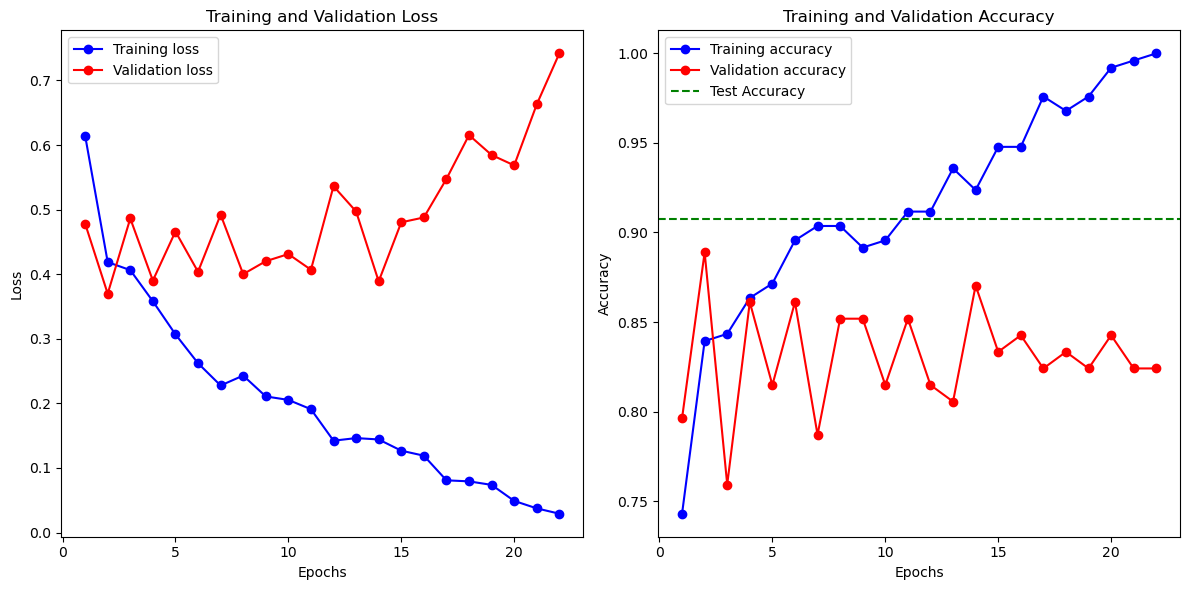

In [28]:
# Save Best Model
best_model = keras.models.load_model('best_model.keras')

# Test data evaluation
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)

print(f'Test Accuracy of the Best Model: {test_accuracy:.4f}')
print(f'Test loss of the Best Model : {test_loss: .4f}')

# Assesment scores
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(train_loss) + 1)

# plotting
plt.figure(figsize=(12, 6))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'bo-', label='Training loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc, 'bo-', label='Training accuracy')
plt.plot(epochs, val_acc, 'ro-', label='Validation accuracy')
plt.axhline(y=test_accuracy, color='g', linestyle='--', label='Test Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.savefig('Deep learning results.png')
plt.show()

## Over Sample(o) & Class Weight(o)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


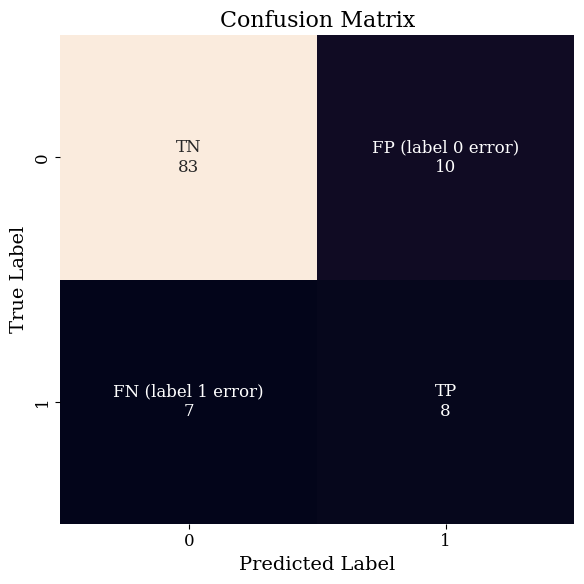

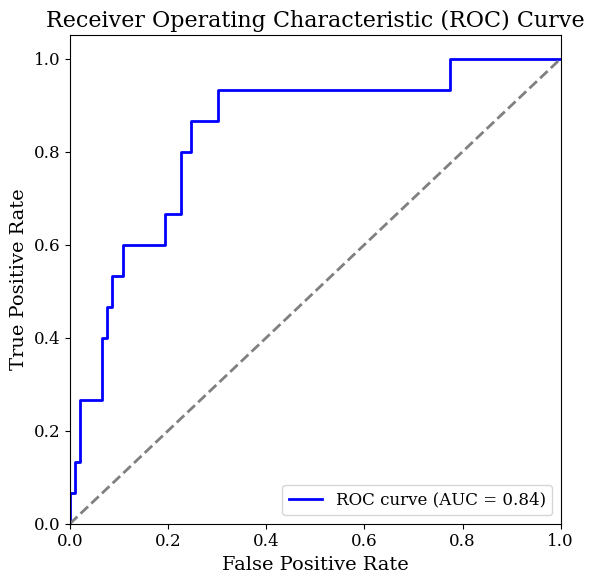

In [43]:
# Confusion Matirx & ROC Curve
from sklearn.metrics import confusion_matrix, roc_curve, auc
import seaborn as sns

# Load Best Model
best_model = keras.models.load_model('over&sample.keras')

# Confusion Matrix
y_pred = best_model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

conf_matrix = confusion_matrix(y_test, y_pred_classes)


# Annotation 
group_names = ['TN', 'FP (label 0 error)', 'FN (label 1 error)', 'TP']
group_counts = [value for value in conf_matrix.flatten()]
labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names, group_counts)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize = (6,6))
sns.heatmap(conf_matrix, annot = labels, fmt = '', cbar = False, color = 'Blue')
plt.title('Confusion Matrix', fontsize = 16)
plt.xlabel('Predicted Label', fontsize = 14)
plt.ylabel('True Label', fontsize = 14)
plt.tight_layout()
plt.savefig('Confusion Matrix.png', dpi = 300)
plt.show()


fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)


plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.legend(loc='lower right', fontsize=12)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.tight_layout()
plt.savefig('ROC_Curve.png', dpi=300)
plt.show()

In [45]:
from sklearn.metrics import classification_report

# Load Best Model
best_model = keras.models.load_model('over&sample.keras')

# Confusion Matrix
y_pred = best_model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)


d_report = classification_report(y_test, y_pred_classes, output_dict=True)
print(classification_report(y_test, y_pred_classes))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
              precision    recall  f1-score   support

           0       0.92      0.89      0.91        93
           1       0.44      0.53      0.48        15

    accuracy                           0.84       108
   macro avg       0.68      0.71      0.70       108
weighted avg       0.86      0.84      0.85       108



In [46]:
# Append Deeplearning result
result_1['Multilayer Perceptron'] = {
        'f1_score' : d_report['weighted avg']['f1-score'],
        'accuracy' : d_report['accuracy']
    }

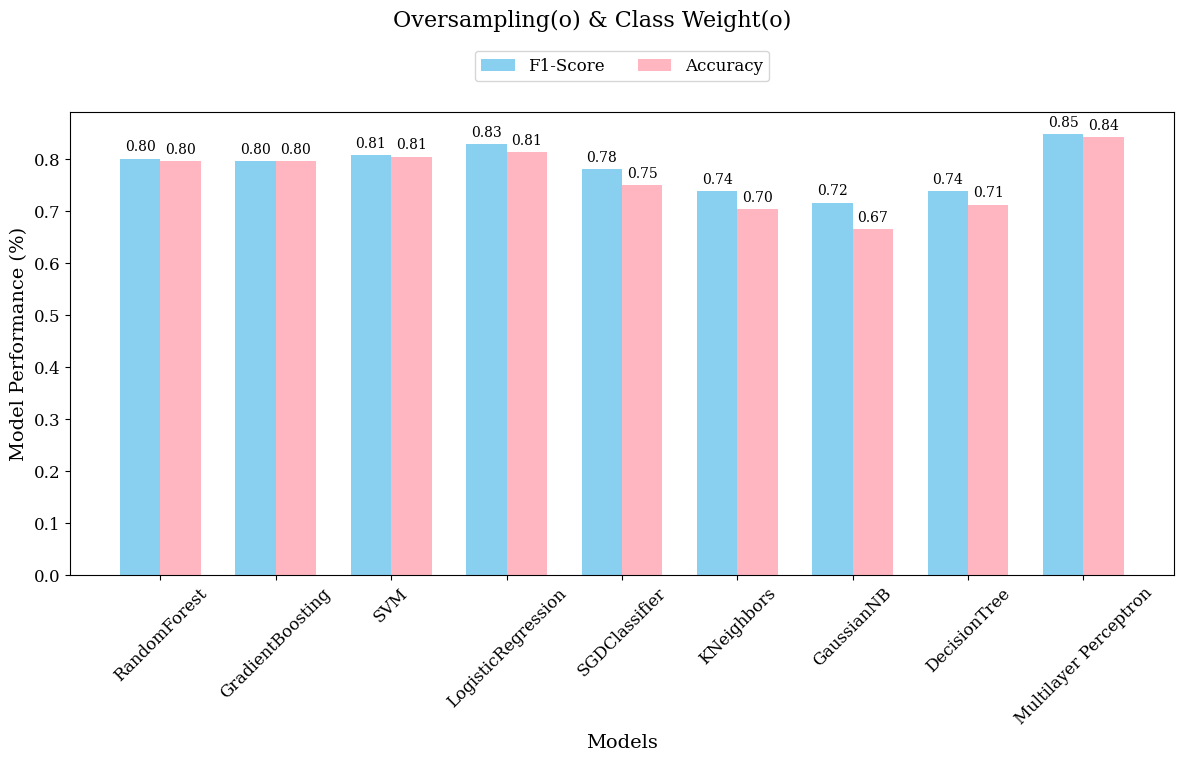

In [100]:
# Visualizaiton
plt.rcParams.update({'font.family': 'serif', 'font.size': 12})

# Data from the user's dictionary
models = list(result_1.keys())
    
f1_scores = [metrics['f1_score'] for metrics in result_1.values()]
accuracies = [metrics['accuracy'] for metrics in result_1.values()]

width = 0.35  # width of the bars
x = np.arange(len(models))  # the label locations

fig, ax = plt.subplots(figsize=(12, 8))

# Softer colors for a more visually appealing look
rects1 = ax.bar(x - width/2, f1_scores, width, label='F1-Score', color='#89CFF0') 
rects2 = ax.bar(x + width/2, accuracies, width, label='Accuracy', color='#FFB6C1')  

# Adding labels and custom x-axis tick labels
ax.set_xlabel('Models', fontsize=14)
ax.set_ylabel('Model Performance (%)', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=2, fontsize=12)  # Move legend above the plot

# Displaying the values on top of bars
for rect in rects1:
    height = rect.get_height()
    ax.annotate(f'{height:.2f}', xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', fontsize=10)

for rect in rects2:
    height = rect.get_height()
    ax.annotate(f'{height:.2f}', xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', fontsize=10)

# Remove gridlines for a cleaner look
ax.grid(False)

plt.suptitle('Oversampling(o) & Class Weight(o)', fontsize=16, y=0.95)

plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Over&Class.png', dpi = 300)
plt.show()

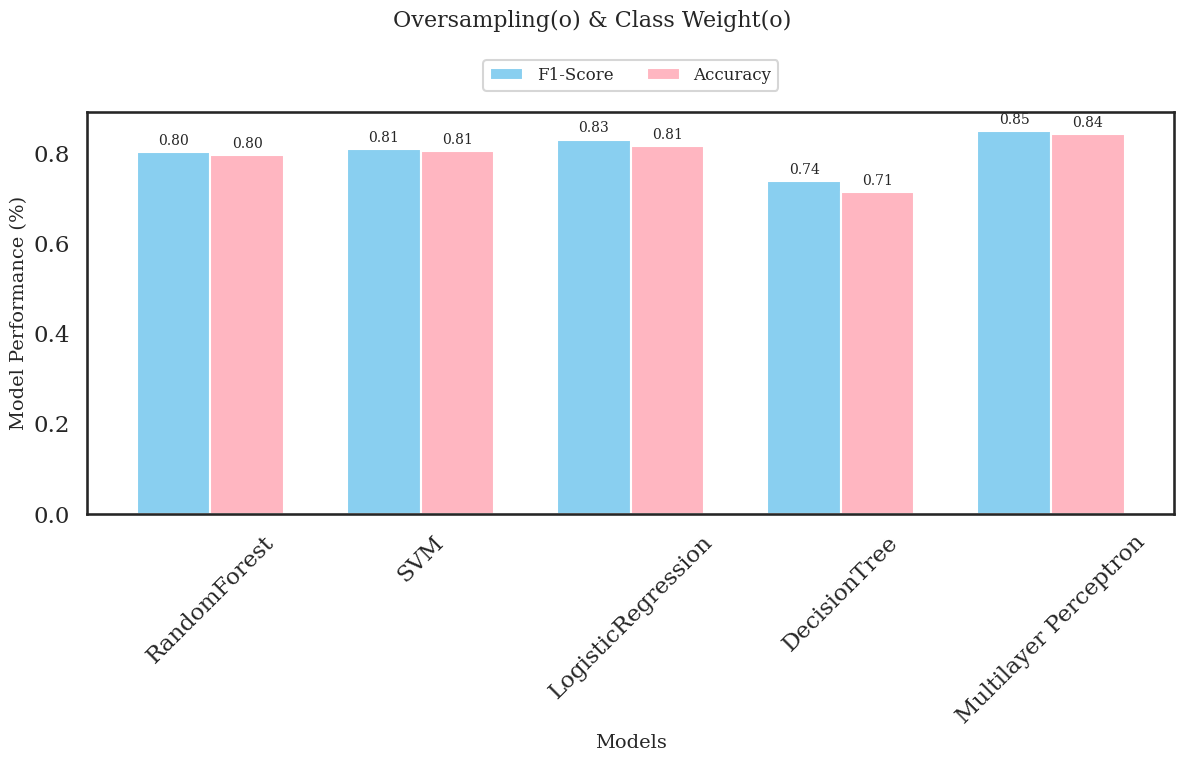

In [143]:
# Visualizaiton
plt.rcParams.update({'font.family': 'serif', 'font.size': 12})

# Representative model choose 
models = {'RandomForest', 'LogisticRegression', 'SVM', 'Multilayer Perceptron', 'DecisionTree'} # Ensemble, Linear, Non-Linear, Deep, Baseline
    

metrics_1 = {model_name: value for model_name, value in result_1.items() if model_name in models}

f1_scores = [metrics['f1_score'] for metrics in metrics_1.values()]
accuracies = [metrics['accuracy'] for metrics in metrics_1.values()]

width = 0.35  # width of the bars
x = np.arange(len(models))  # the label locations

fig, ax = plt.subplots(figsize=(12, 8))

# Softer colors for a more visually appealing look
rects1 = ax.bar(x - width/2, f1_scores, width, label='F1-Score', color='#89CFF0') 
rects2 = ax.bar(x + width/2, accuracies, width, label='Accuracy', color='#FFB6C1')  

# Adding labels and custom x-axis tick labels
ax.set_xlabel('Models', fontsize=14)
ax.set_ylabel('Model Performance (%)', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(metrics_1.keys())
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=2, fontsize=12)  # Move legend above the plot

# Displaying the values on top of bars
for rect in rects1:
    height = rect.get_height()
    ax.annotate(f'{height:.2f}', xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', fontsize=10)

for rect in rects2:
    height = rect.get_height()
    ax.annotate(f'{height:.2f}', xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', fontsize=10)

# Remove gridlines for a cleaner look
ax.grid(False)

plt.suptitle('Oversampling(o) & Class Weight(o)', fontsize=16, y=0.95)

plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Over&Class.png', dpi = 300)
plt.show()


## Oversample(x) & Class Weight(o)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


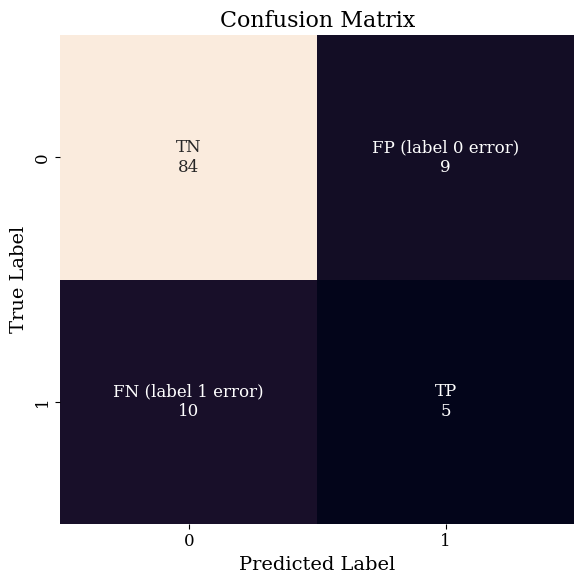

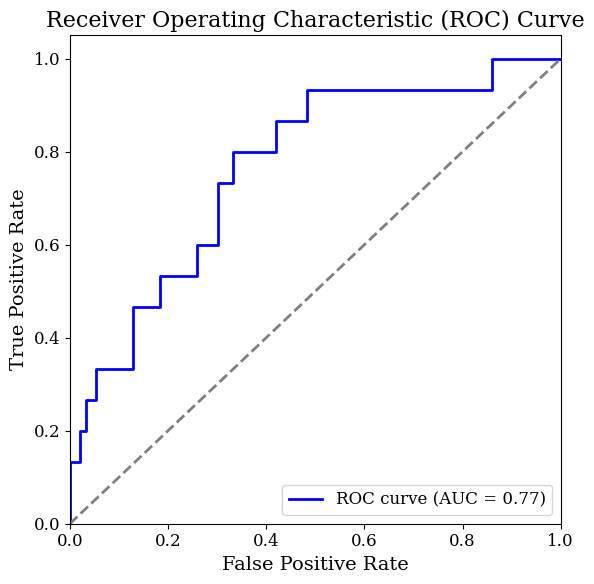

In [48]:
# Confusion Matirx & ROC Curve
from sklearn.metrics import confusion_matrix, roc_curve, auc
import seaborn as sns

# Load Best Model
best_model = keras.models.load_model('sample.keras')

# Confusion Matrix
y_pred = best_model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

conf_matrix = confusion_matrix(y_test, y_pred_classes)


# Annotation 
group_names = ['TN', 'FP (label 0 error)', 'FN (label 1 error)', 'TP']
group_counts = [value for value in conf_matrix.flatten()]
labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names, group_counts)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize = (6,6))
sns.heatmap(conf_matrix, annot = labels, fmt = '', cbar = False, color = 'Blue')
plt.title('Confusion Matrix', fontsize = 16)
plt.xlabel('Predicted Label', fontsize = 14)
plt.ylabel('True Label', fontsize = 14)
plt.tight_layout()
plt.savefig('Confusion Matrix.png', dpi = 300)
plt.show()


fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)


plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.legend(loc='lower right', fontsize=12)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.tight_layout()
plt.savefig('ROC_Curve.png', dpi=300)
plt.show()

In [58]:
from sklearn.metrics import classification_report

# Load Best Model
best_model = keras.models.load_model('sample.keras')

# Confusion Matrix
y_pred = best_model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)


d_report = classification_report(y_test, y_pred_classes, output_dict=True)
print(classification_report(y_test, y_pred_classes))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
              precision    recall  f1-score   support

           0       0.89      0.90      0.90        93
           1       0.36      0.33      0.34        15

    accuracy                           0.82       108
   macro avg       0.63      0.62      0.62       108
weighted avg       0.82      0.82      0.82       108



In [59]:
# Append Deeplearning result
result_2['Multilayer Perceptron'] = {
        'f1_score' : d_report['weighted avg']['f1-score'],
        'accuracy' : d_report['accuracy']
    }

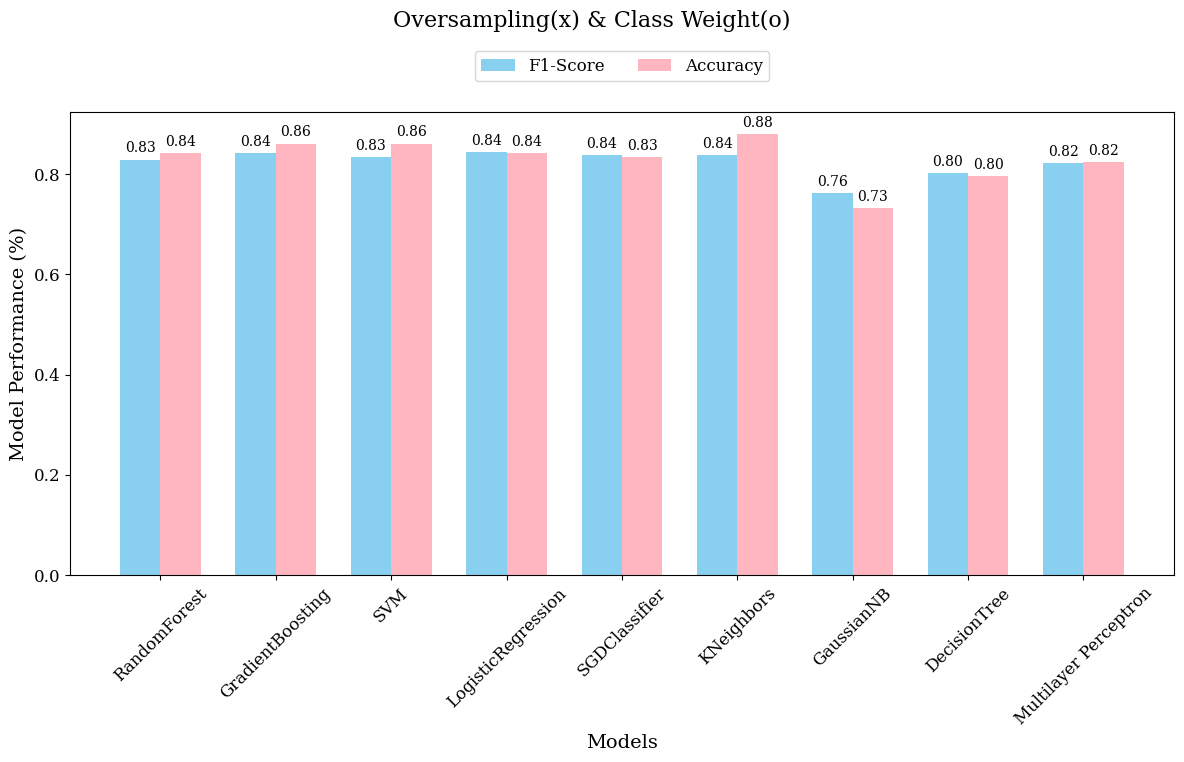

In [60]:
# Visualizaiton
plt.rcParams.update({'font.family': 'serif', 'font.size': 12})

# Data from the user's dictionary
models = list(result_2.keys())
f1_scores = [metrics['f1_score'] for metrics in result_2.values()]
accuracies = [metrics['accuracy'] for metrics in result_2.values()]

width = 0.35  # width of the bars
x = np.arange(len(models))  # the label locations

fig, ax = plt.subplots(figsize=(12, 8))

# Softer colors for a more visually appealing look
rects1 = ax.bar(x - width/2, f1_scores, width, label='F1-Score', color='#89CFF0') 
rects2 = ax.bar(x + width/2, accuracies, width, label='Accuracy', color='#FFB6C1')  

# Adding labels and custom x-axis tick labels
ax.set_xlabel('Models', fontsize=14)
ax.set_ylabel('Model Performance (%)', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=2, fontsize=12)  # Move legend above the plot

# Displaying the values on top of bars
for rect in rects1:
    height = rect.get_height()
    ax.annotate(f'{height:.2f}', xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', fontsize=10)

for rect in rects2:
    height = rect.get_height()
    ax.annotate(f'{height:.2f}', xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', fontsize=10)

# Remove gridlines for a cleaner look
ax.grid(False)

plt.suptitle('Oversampling(x) & Class Weight(o)', fontsize=16, y=0.95)

plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('sample.png', dpi = 300)
plt.show()

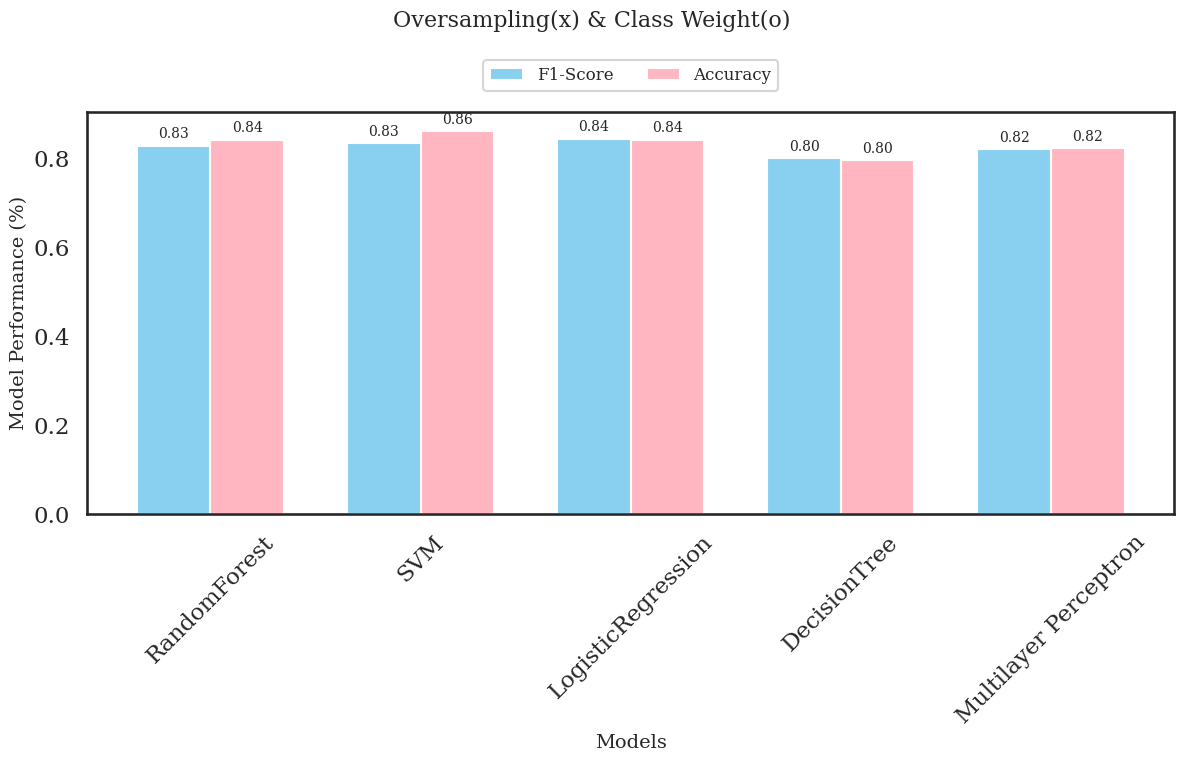

In [144]:
# Visualizaiton
plt.rcParams.update({'font.family': 'serif', 'font.size': 12})

# Representative model choose 
models = {'RandomForest', 'LogisticRegression', 'SVM', 'Multilayer Perceptron', 'DecisionTree'} # Ensemble, Linear, Non-Linear, Deep, Baseline
    

metrics_2 = {model_name: value for model_name, value in result_2.items() if model_name in models}

f1_scores = [metrics['f1_score'] for metrics in metrics_2.values()]
accuracies = [metrics['accuracy'] for metrics in metrics_2.values()]

width = 0.35  # width of the bars
x = np.arange(len(models))  # the label locations

fig, ax = plt.subplots(figsize=(12, 8))

# Softer colors for a more visually appealing look
rects1 = ax.bar(x - width/2, f1_scores, width, label='F1-Score', color='#89CFF0') 
rects2 = ax.bar(x + width/2, accuracies, width, label='Accuracy', color='#FFB6C1')  

# Adding labels and custom x-axis tick labels
ax.set_xlabel('Models', fontsize=14)
ax.set_ylabel('Model Performance (%)', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(metrics_2.keys())
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=2, fontsize=12)  # Move legend above the plot

# Displaying the values on top of bars
for rect in rects1:
    height = rect.get_height()
    ax.annotate(f'{height:.2f}', xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', fontsize=10)

for rect in rects2:
    height = rect.get_height()
    ax.annotate(f'{height:.2f}', xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', fontsize=10)

# Remove gridlines for a cleaner look
ax.grid(False)

plt.suptitle('Oversampling(x) & Class Weight(o)', fontsize=16, y=0.95)

plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('sample.png', dpi = 300)
plt.show()

## Oversample(o) & Class Weight(x)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


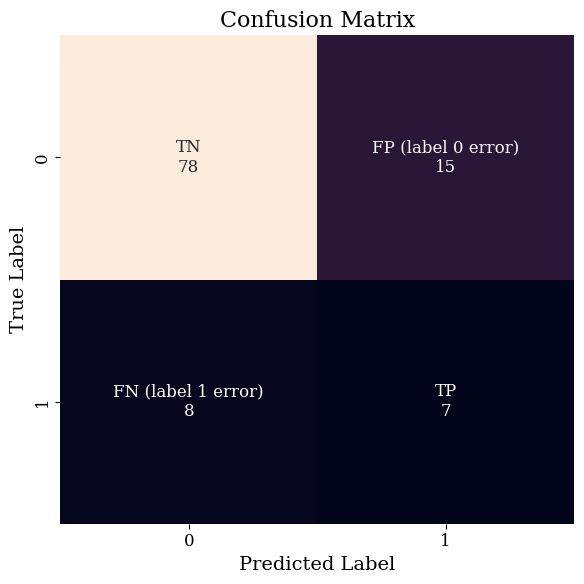

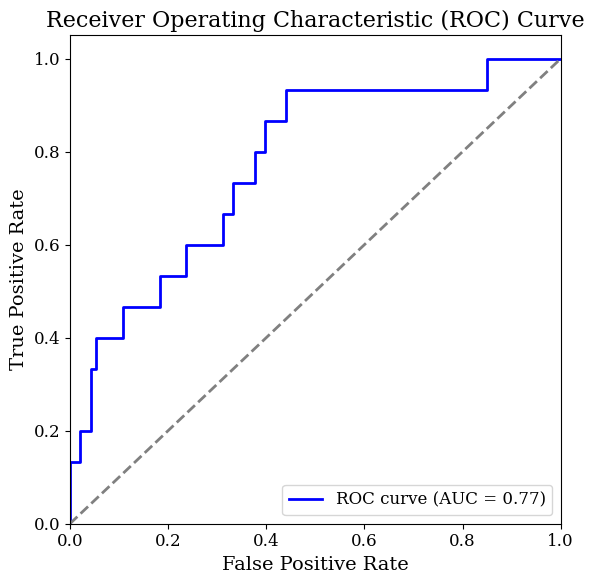

In [53]:
# Confusion Matirx & ROC Curve
from sklearn.metrics import confusion_matrix, roc_curve, auc
import seaborn as sns

# Load Best Model
best_model = keras.models.load_model('over.keras')

# Confusion Matrix
y_pred = best_model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

conf_matrix = confusion_matrix(y_test, y_pred_classes)


# Annotation 
group_names = ['TN', 'FP (label 0 error)', 'FN (label 1 error)', 'TP']
group_counts = [value for value in conf_matrix.flatten()]
labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names, group_counts)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize = (6,6))
sns.heatmap(conf_matrix, annot = labels, fmt = '', cbar = False, color = 'Blue')
plt.title('Confusion Matrix', fontsize = 16)
plt.xlabel('Predicted Label', fontsize = 14)
plt.ylabel('True Label', fontsize = 14)
plt.tight_layout()
plt.savefig('Confusion Matrix.png', dpi = 300)
plt.show()


fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)


plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.legend(loc='lower right', fontsize=12)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.tight_layout()
plt.savefig('ROC_Curve.png', dpi=300)
plt.show()

In [54]:
from sklearn.metrics import classification_report

# Load Best Model
best_model = keras.models.load_model('over.keras')

# Confusion Matrix
y_pred = best_model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)


d_report = classification_report(y_test, y_pred_classes, output_dict=True)
print(classification_report(y_test, y_pred_classes))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
              precision    recall  f1-score   support

           0       0.91      0.84      0.87        93
           1       0.32      0.47      0.38        15

    accuracy                           0.79       108
   macro avg       0.61      0.65      0.62       108
weighted avg       0.83      0.79      0.80       108



In [55]:
# Append Deeplearning result
result_3['Multilayer Perceptron'] = {
        'f1_score' : d_report['weighted avg']['f1-score'],
        'accuracy' : d_report['accuracy']
    }

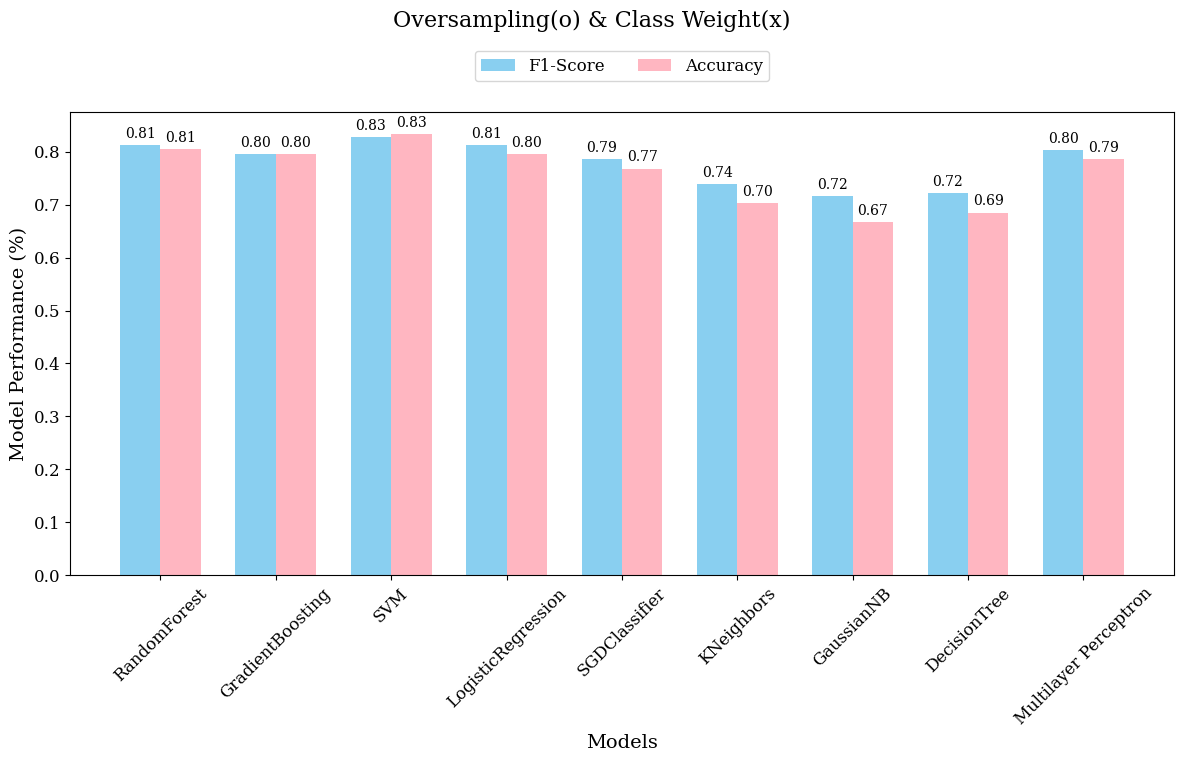

In [57]:
# Visualizaiton
plt.rcParams.update({'font.family': 'serif', 'font.size': 12})

# Data from the user's dictionary
models = list(result_3.keys())
f1_scores = [metrics['f1_score'] for metrics in result_3.values()]
accuracies = [metrics['accuracy'] for metrics in result_3.values()]

width = 0.35  # width of the bars
x = np.arange(len(models))  # the label locations

fig, ax = plt.subplots(figsize=(12, 8))

# Softer colors for a more visually appealing look
rects1 = ax.bar(x - width/2, f1_scores, width, label='F1-Score', color='#89CFF0') 
rects2 = ax.bar(x + width/2, accuracies, width, label='Accuracy', color='#FFB6C1')  

# Adding labels and custom x-axis tick labels
ax.set_xlabel('Models', fontsize=14)
ax.set_ylabel('Model Performance (%)', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=2, fontsize=12)  # Move legend above the plot

# Displaying the values on top of bars
for rect in rects1:
    height = rect.get_height()
    ax.annotate(f'{height:.2f}', xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', fontsize=10)

for rect in rects2:
    height = rect.get_height()
    ax.annotate(f'{height:.2f}', xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', fontsize=10)

# Remove gridlines for a cleaner look
ax.grid(False)

plt.suptitle('Oversampling(o) & Class Weight(x)', fontsize=16, y=0.95)

plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('over.png', dpi = 300)
plt.show()

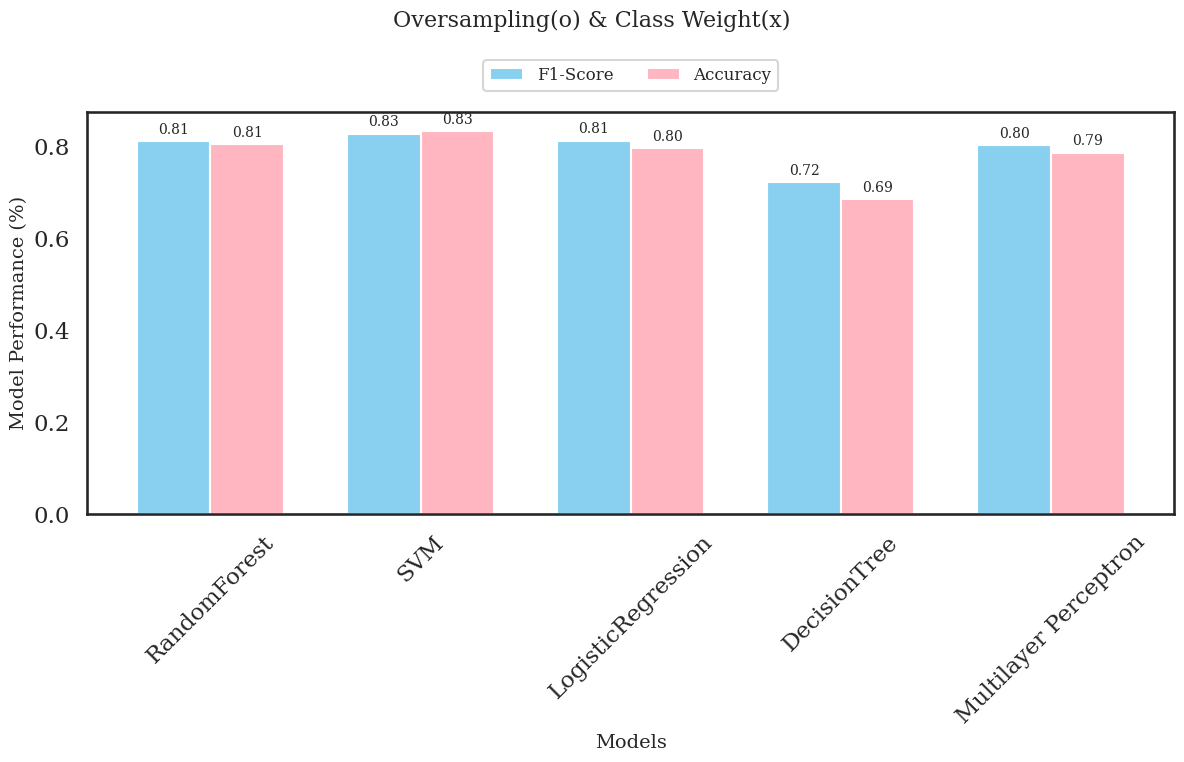

In [141]:
# Visualizaiton
plt.rcParams.update({'font.family': 'serif', 'font.size': 12})

# Representative model choose 
models = {'RandomForest', 'LogisticRegression', 'SVM', 'Multilayer Perceptron', 'DecisionTree'} # Ensemble, Linear, Non-Linear, Deep, Baseline
    

metrics_3 = {model_name: value for model_name, value in result_3.items() if model_name in models}

f1_scores = [metrics['f1_score'] for metrics in metrics_3.values()]
accuracies = [metrics['accuracy'] for metrics in metrics_3.values()]

width = 0.35  # width of the bars
x = np.arange(len(models))  # the label locations

fig, ax = plt.subplots(figsize=(12, 8))

# Softer colors for a more visually appealing look
rects1 = ax.bar(x - width/2, f1_scores, width, label='F1-Score', color='#89CFF0') 
rects2 = ax.bar(x + width/2, accuracies, width, label='Accuracy', color='#FFB6C1')  

# Adding labels and custom x-axis tick labels
ax.set_xlabel('Models', fontsize=14)
ax.set_ylabel('Model Performance (%)', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(metrics_3.keys())
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=2, fontsize=12)  # Move legend above the plot

# Displaying the values on top of bars
for rect in rects1:
    height = rect.get_height()
    ax.annotate(f'{height:.2f}', xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', fontsize=10)

for rect in rects2:
    height = rect.get_height()
    ax.annotate(f'{height:.2f}', xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', fontsize=10)

# Remove gridlines for a cleaner look
ax.grid(False)

plt.suptitle('Oversampling(o) & Class Weight(x)', fontsize=16, y=0.95)

plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('over.png', dpi = 300)
plt.show()

In [124]:
!pip list

Package                           Version
--------------------------------- ------------
absl-py                           2.1.0
agate                             1.10.2
agate-dbf                         0.2.3
agate-excel                       0.4.1
agate-sql                         0.7.2
aiobotocore                       2.7.0
aiohttp                           3.9.3
aiohttp-retry                     2.8.3
aioitertools                      0.7.1
aiosignal                         1.2.0
alabaster                         0.7.12
altair                            5.0.1
amqp                              5.2.0
anaconda-anon-usage               0.4.3
anaconda-catalogs                 0.2.0
anaconda-client                   1.12.3
anaconda-cloud-auth               0.1.4
anaconda-navigator                2.5.2
anaconda-project                  0.11.1
antlr4-python3-runtime            4.9.3
anyio                             4.2.0
appdirs                           1.4.4
archspec                   